In [1]:
import numpy as np                          # library to support matrix computations
import pandas as pd                         # library for data manipulation and analysis
import json
from os import listdir
import re
from scipy.linalg import eig                # linear algebra functions
import matplotlib.pyplot as plt
from string import ascii_uppercase
import unidecode
from pprint import pprint


In [2]:
def pca(X):
    ''' Principal Components Analysis '''
    cov_matrix = np.cov(X.T) # Transpose b/c np.cov assumes row vars.
    evals, evecs = eig(cov_matrix)
    idcs = np.argsort(evals)[::-1]
    evecs = evecs.real[:, idcs]
    evals = evals.real[idcs]

    return evecs, evals

In [3]:
def preprocess(df):

    old_vals = ['Strongly Disagree',
                'Disagree',
                'Uncertain',
                'Agree',
                'Strongly Agree',
                'No Opinion',
                'Did Not Answer',
                'Did Not Vote',
                'Did not answer',
                None]
    new_vals = [-1.5,
                -1,
                0,
                1,
                1.5,
                np.nan,
                np.nan,
                np.nan,
                np.nan,
                np.nan]

    df = df.replace(old_vals, new_vals)

    # Only retain responders with > 75% response rate
    num_questions = len(df.columns)
    df = df[df.notnull().sum(axis=1) > (num_questions * 0.75)]

    # Replace remaining nans with the column mean
    df = df.fillna(df.mean())

    df = df.sort_index()
    return df

In [4]:
year = '2021'
survey_dir = 'surveys'

In [5]:
fnames_to_slugs = {
'2021-01-01-US-EEP-Bah-Humbug.csv':'bah-humbug',
'2021-01-01-US-EEP-Balanced-Budget-Amendment.csv':'balanced-budget-amendment',
'2021-01-01-US-EEP-Baumols-Cost-Disease.csv':'baumols-cost-disease',
'2021-01-01-US-EEP-Breaking-Up-Large-Tech-Companies.csv':'breaking-up-large-tech-companies',
'2021-01-01-US-EEP-Christmas-Spending.csv':'christmas-spending',
'2021-01-01-US-EEP-Climate-Change-Policies.csv':'climate-change-policies',
'2021-01-01-US-EEP-College-Admissions.csv':'college-admissions',
'2021-01-01-US-EEP-Corporate-Social-Responsibility.csv':'corporate-social-responsibility',
'2021-01-01-US-EEP-Currency-Manipulation.csv':'currency-manipulation',
'2021-01-01-US-EEP-Deficits.csv':'deficits',
'2021-01-01-US-EEP-Economic-Policy-Advice.csv':'economic-policy-advice',
'2021-01-01-US-EEP-Executive-Pay.csv':'executive-pay',
'2021-01-01-US-EEP-Free-Trade.csv':'free-trade',
'2021-01-01-US-EEP-Gold-Standard.csv':'gold-standard',
'2021-01-01-US-EEP-Market-Share-Market-Power.csv':'market-share-market-power',
'2021-01-01-US-EEP-Modern-Monetary-Theory.csv':'modern-monetary-theory',
'2021-01-01-US-EEP-Obesity-Soft-Drinks.csv':'obesity-soft-drinks',
'2021-01-01-US-EEP-Occupational-Licensing.csv':'occupational-licensing',
'2021-01-01-US-EEP-Oil-Price-Speculation.csv':'oil-price-speculation',
'2021-01-01-US-EEP-Patents.csv':'patents',
'2021-01-01-US-EEP-Payday-Lending.csv':'payday-lending',
'2021-01-01-US-EEP-Poverty-Measurement.csv':'poverty-measurement',
'2021-01-01-US-EEP-Prices-of-Medical-Supplies.csv':'prices-of-medical-supplies',
'2021-01-01-US-EEP-Quarterly-Earnings.csv':'quarterly-earnings',
'2021-01-01-US-EEP-Ranked-choice-Voting.csv':'ranked-choice-voting',
'2021-01-01-US-EEP-Robots-Artifical-Intelligence.csv':'robots-artifical-intelligence',
'2021-01-01-US-EEP-Sports-Betting.csv':'sports-betting',
'2021-01-01-US-EEP-Sports-Stadiums.csv':'sports-stadiums',
'2021-01-01-US-EEP-Stakeholder-Capitalism.csv':'stakeholder-capitalism',
'2021-01-01-US-EEP-State-run-Lotteries.csv':'state-run-lotteries',
'2021-01-01-US-EEP-Stock-Prices.csv':'stock-prices',
'2021-01-01-US-EEP-Subsidies-to-Attract-Businesses.csv':'subsidies-to-attract-businesses',
'2021-01-01-US-EEP-Supplying-Kidneys.csv':'supplying-kidneys',
'2021-01-01-US-EEP-Surge-Pricing.csv':'surge-pricing',
'2021-01-01-US-EEP-Textbook-Prices.csv':'textbook-prices',
'2021-01-01-US-EEP-The-Dollar.csv':'the-dollar',
'2021-01-01-US-EEP-Ticket-Resale.csv':'ticket-resale',
'2021-01-01-US-EEP-Trade-Deals.csv':'trade-deals',
'2021-01-01-US-EEP-Trade-Exchange-Rates.csv':'trade-exchange-rates',
'2021-01-01-US-EEP-Unemployment-US-Economy.csv':'unemployment-us-economy',
}

In [6]:
fnames = sorted(fnames_to_slugs.keys())
qdfs = []
slugs = []
for fname in fnames:
    pprint(survey_dir)
    qdf = pd.read_csv(survey_dir + '/' + fname)
    qdf = qdf.set_index(qdf['First Name'].str.cat(qdf['Last Name'], sep=' '))
    drop_columns = [col for col in qdf.columns if 'Confidence in this topic' in col or 'Please explain your' in col or 'Unnamed' in col]
    drop_columns += ['First Name', 'Last Name']
    qdf = qdf.drop(columns=drop_columns)
    qdf = qdf[qdf.index.notnull()]
    n_cols = len(qdf.columns)
    if n_cols > 1:
        qdf.columns = [f"Part {ascii_uppercase[i]}: {col}" for i, col in enumerate(qdf.columns)]
    
    qdfs += [qdf]
    for col in qdf.columns:
        slugs += [fnames_to_slugs[fname]]
df = pd.concat(qdfs, axis=1)
df.columns = [f"{i+1}. {col}" for i, col in enumerate(df.columns)]      # what does the final data strucutre look like?

pprint(df)
print(type(df))


'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
'surveys'
                    1. Giving specific presents as holiday gifts is inefficient, because recipients could satisfy their preferences much better with cash.  \
First Name                                                                                                                                                   
Daron Acemoglu                                                Disagree                                                                                       
Alberto Alesina                                      Strongly Disagree                                                        

In [7]:
df = preprocess(df)

In [8]:
X_raw = np.array(df).astype(float)
q_means = X_raw.mean(axis=0)
q_sds = X_raw.std(axis=0)

In [9]:
# Separate responder IDs from row names
responder_ids = list(range(len(df)))

# Compute +/- 2SD for each question. For yellow highlights.
X_raw = np.array(df).astype(float)
q_means = X_raw.mean(axis=0)
q_sds = X_raw.std(axis=0)
igm_top_range =    2 * q_sds # Responses will be centered with q_means in .js
igm_bot_range = (-2) * q_sds # Responses will be centered with q_means in .js

# Centering the questions
X = X_raw - X_raw.mean(axis=0)

# Run PCA and compute 2D projection
evecs, evals = pca(X)

In [10]:
# Sign flipping so politically left is on the left
if year == '2021':
    evecs[:,0] = evecs[:,0] #X
    evecs[:,1] = -evecs[:,1]

# Compute each economists projection in 2D space.
proj = np.dot(X, evecs[:, 0:2])

# User info dict
user_info = {'name': 'You',
             'x': 0,
             'y': 0,
             'responder_id': 0}

In [11]:
# Get correlation matrix, sorted by position on x-axis.
pc1_order = np.argsort(proj[:, 0])
corr_mat = np.corrcoef(X_raw[pc1_order, :])

# List of responder info dicts, including user dict
points = [user_info]
assert(len(df)==len(proj))
for i in range(len(proj)):
    responder_info = {'name': df.index[i],
                      'x': proj[i, 0],
                      'y': proj[i, 1],
                      'short_name': unidecode.unidecode(df.index[i].lower().replace(' ', '-')),
                      'pc1_order': int(np.argwhere(pc1_order == i))}
    points.append(responder_info)

In [12]:
out = {}
out['points'] = points
out['q_slugs'] = slugs
out['questions'] = [re.sub(r"\(0+", "(", col) for col in df.columns]
out['q_means'] = list(q_means)
out['xweights'] = list(evecs[:, 0])
out['yweights'] = list(evecs[:, 1])
out['X'] = [['%.2f' % el for el in row] for row in X.tolist()]
out['corr_mat'] = [['%.2f' % el for el in row]
                   for row in corr_mat.tolist()]
out['igm_top_range'] = ['%.2f' % el for el in igm_top_range]
out['igm_bot_range'] = ['%.2f' % el for el in igm_bot_range]

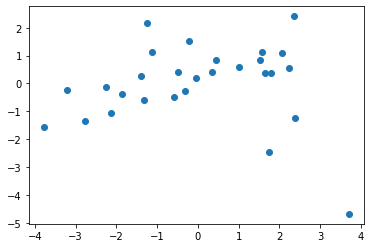

In [13]:
# Write to file
f = open("pca_results_" + year + ".json", "w")
json.dump(out, f, indent=2)
f.close()

# Plot responders in 2D space
plt.figure()
plt.scatter(proj[:, 0], proj[:, 1])
plt.show()